In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
train_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)
test_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [5]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',  'marital_status', 'occupation', 'relationship', 
              'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  wage_class      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


# Age

<AxesSubplot:xlabel='age'>

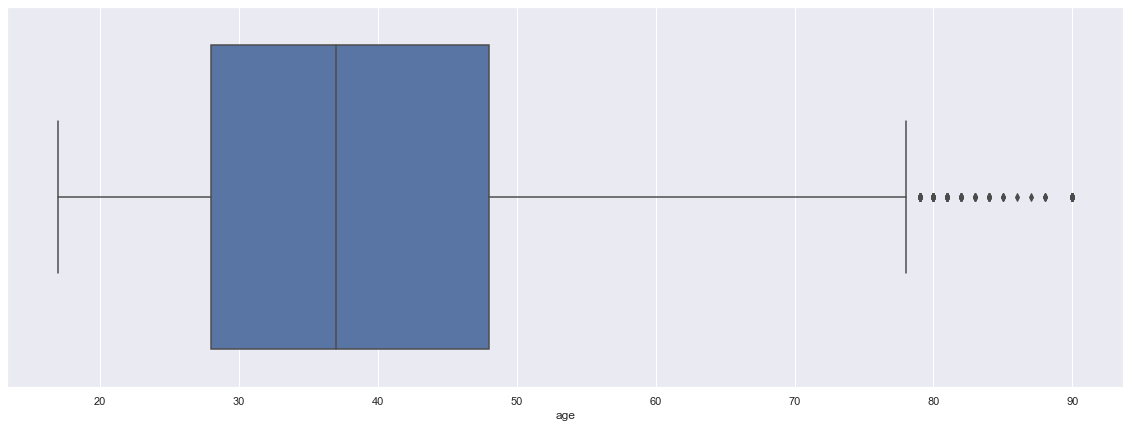

In [36]:
plt.figure(figsize = (20, 7))
sns.boxplot(x = 'age', data = train_set)

<AxesSubplot:xlabel='age'>

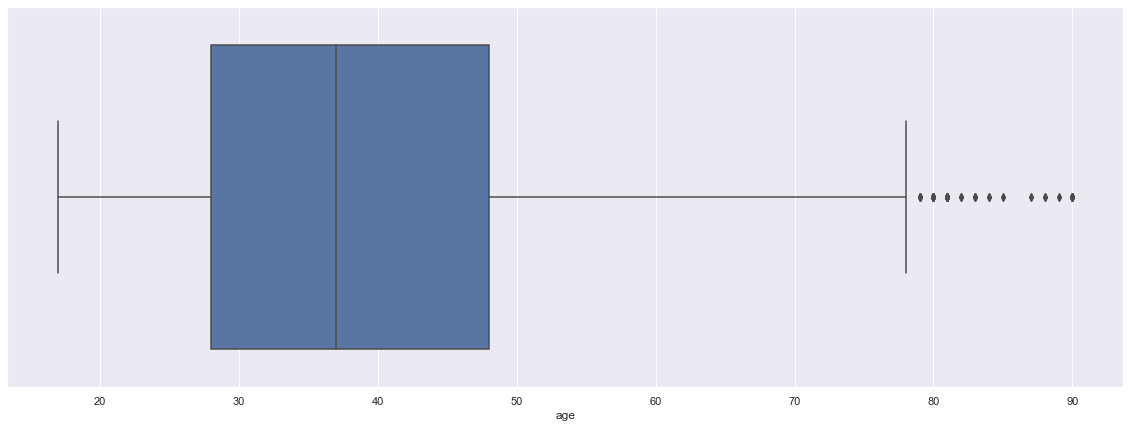

In [37]:
plt.figure(figsize = (20, 7))
sns.boxplot(x = 'age', data = test_set)

# Workclass

<AxesSubplot:xlabel='workclass', ylabel='count'>

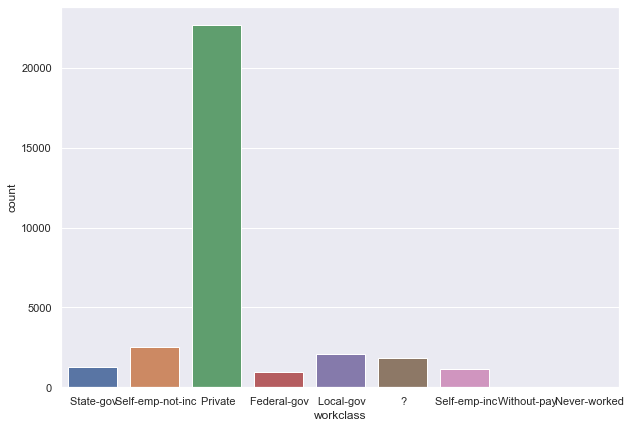

In [12]:
plt.figure(figsize = (10, 7))
sns.countplot(x = 'workclass', data = train_set)

<AxesSubplot:xlabel='workclass', ylabel='count'>

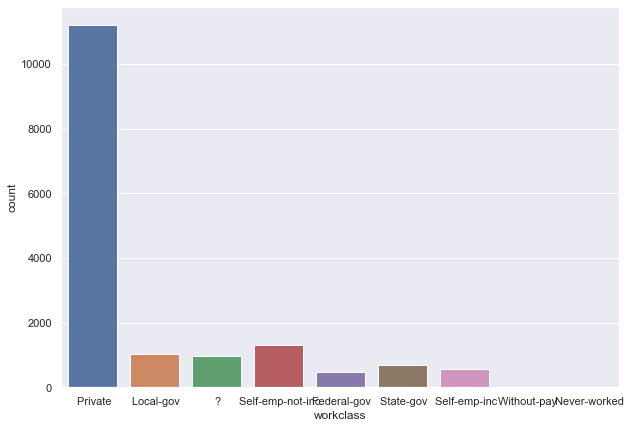

In [14]:
plt.figure(figsize = (10, 7))
sns.countplot(x = 'workclass', data = test_set)

# fnlwgt

<AxesSubplot:xlabel='fnlwgt'>

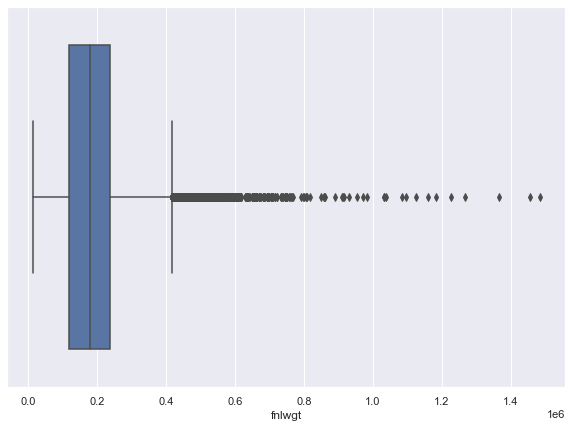

In [52]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'fnlwgt', data = train_set)

<AxesSubplot:xlabel='fnlwgt'>

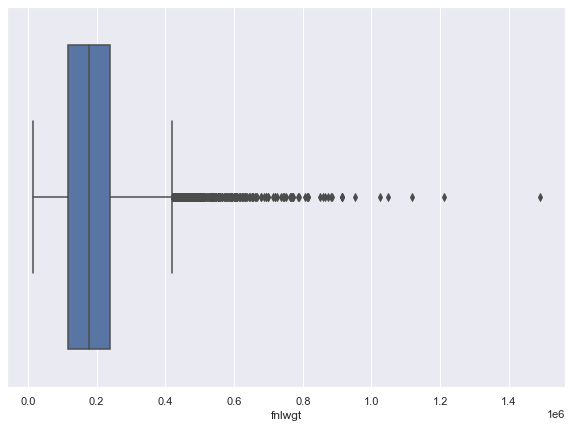

In [53]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'fnlwgt', data = test_set)

# Education

<AxesSubplot:xlabel='education', ylabel='count'>

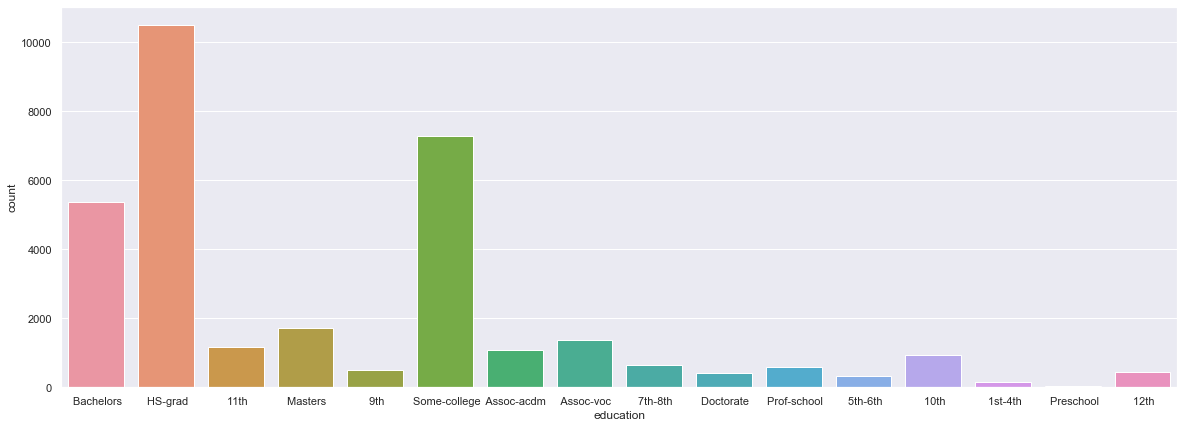

In [17]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'education', data = train_set)

<AxesSubplot:xlabel='education', ylabel='count'>

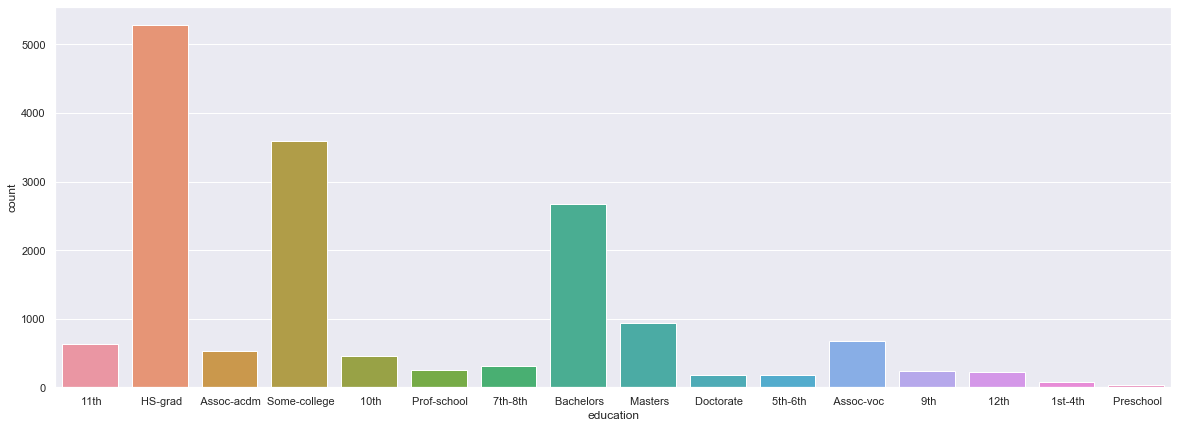

In [18]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'education', data = test_set)

# Education number

<AxesSubplot:xlabel='education_num', ylabel='count'>

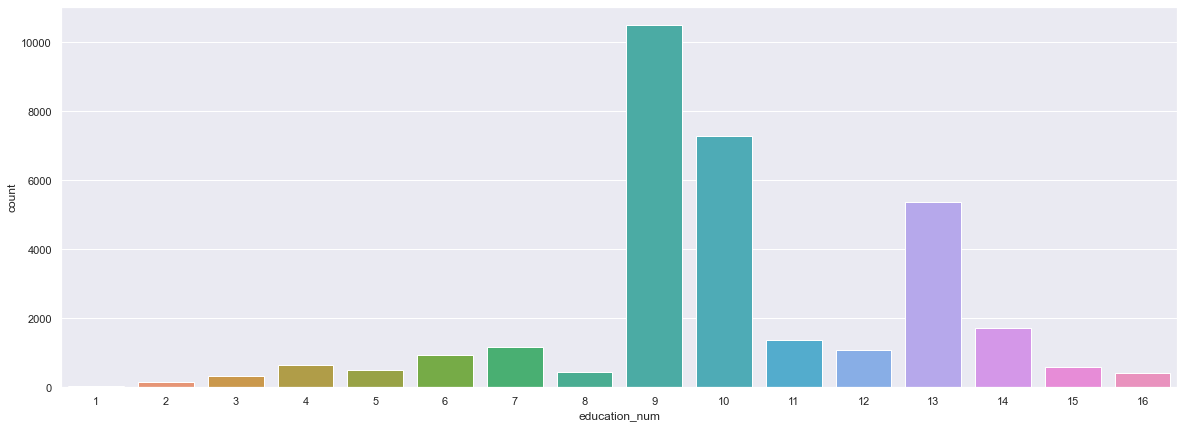

In [19]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'education_num', data = train_set)

<AxesSubplot:xlabel='education_num', ylabel='count'>

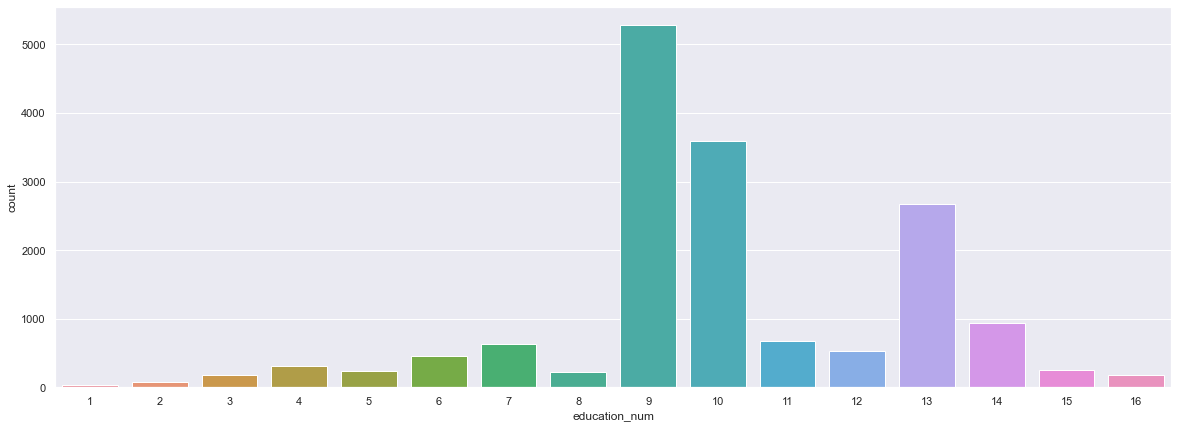

In [20]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'education_num', data = test_set)

# marital_status

<AxesSubplot:xlabel='marital_status', ylabel='count'>

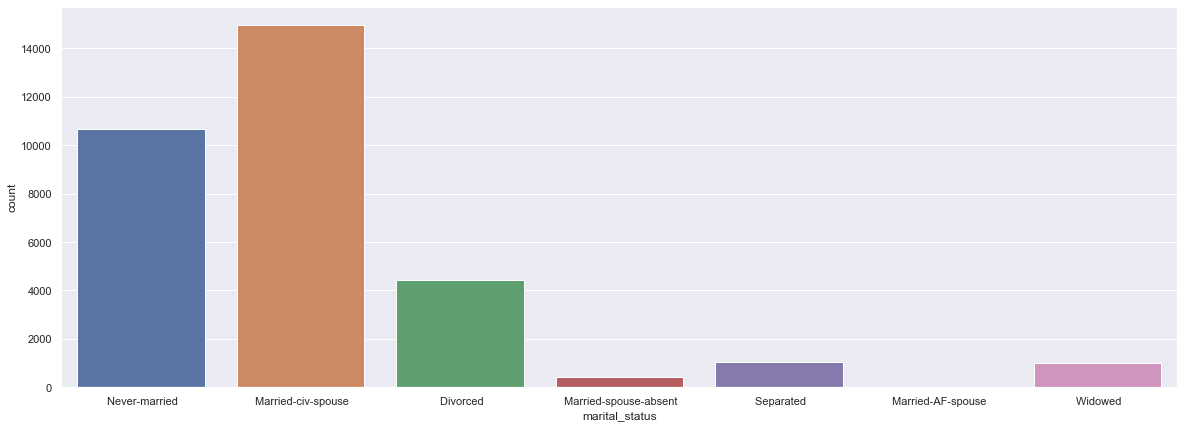

In [22]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'marital_status', data = train_set)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

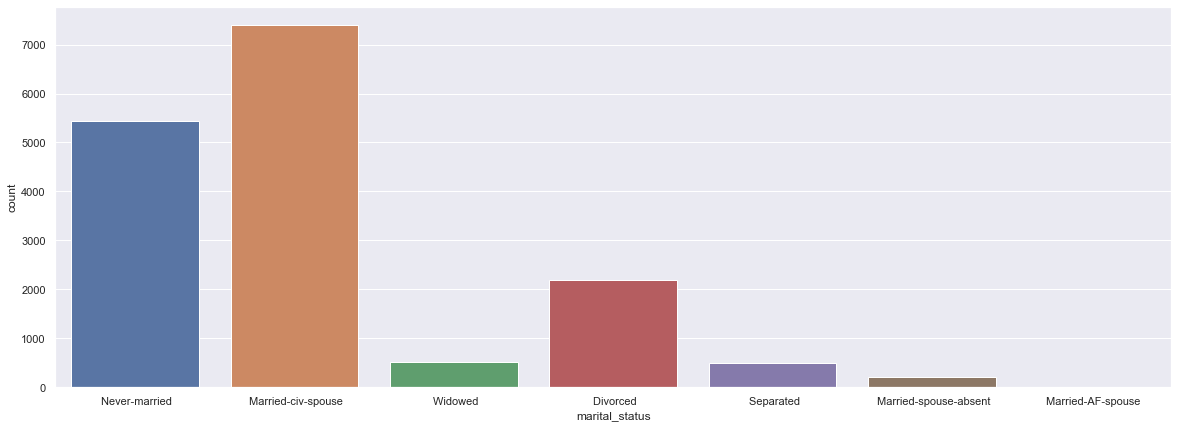

In [23]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'marital_status', data = test_set)

# Occupation

<AxesSubplot:xlabel='occupation', ylabel='count'>

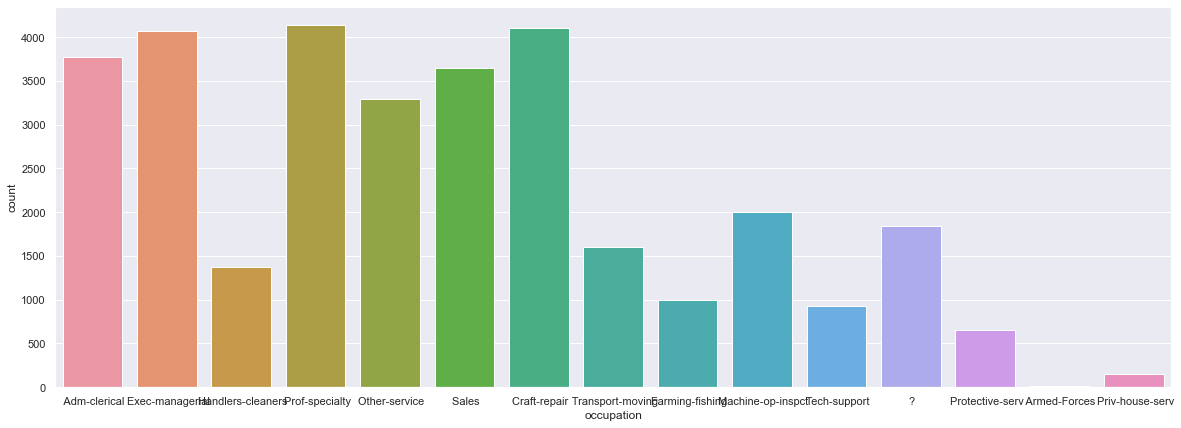

In [24]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'occupation', data = train_set)

<AxesSubplot:xlabel='occupation', ylabel='count'>

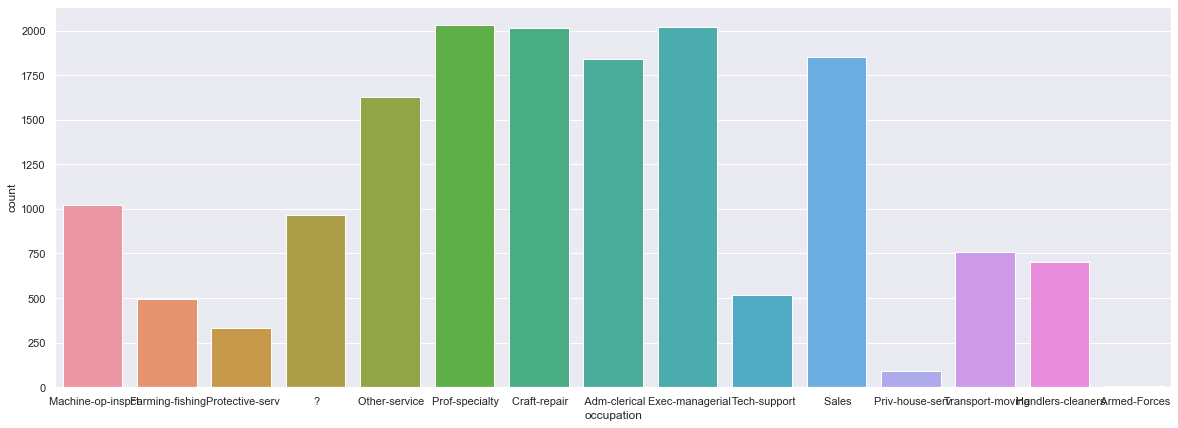

In [25]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'occupation', data = test_set)

# relationship

<AxesSubplot:xlabel='relationship', ylabel='count'>

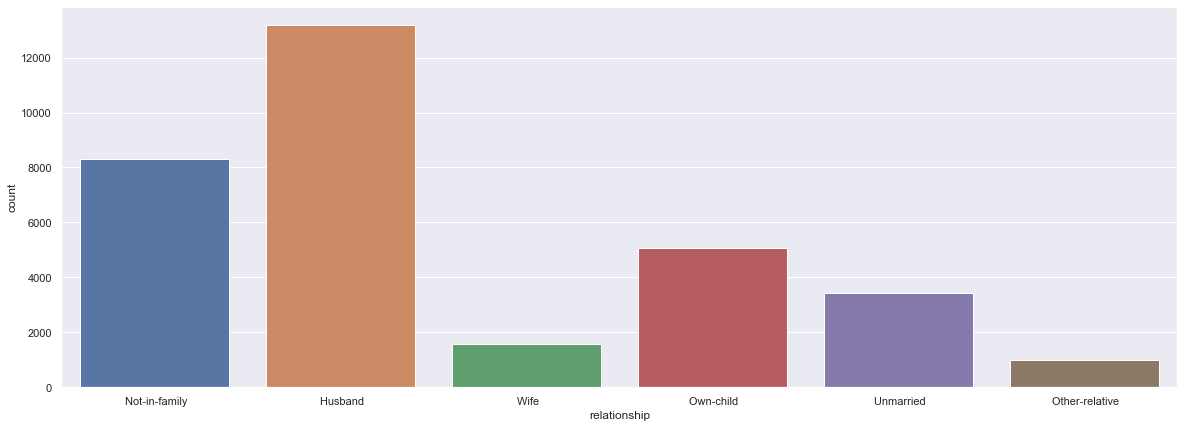

In [26]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'relationship', data = train_set)

<AxesSubplot:xlabel='relationship', ylabel='count'>

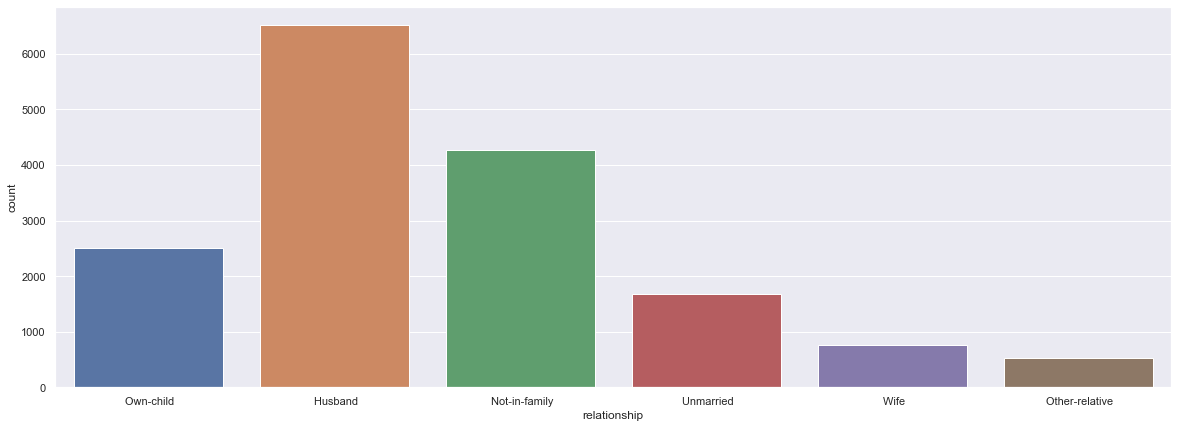

In [27]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'relationship', data = test_set)

# race

<AxesSubplot:xlabel='race', ylabel='count'>

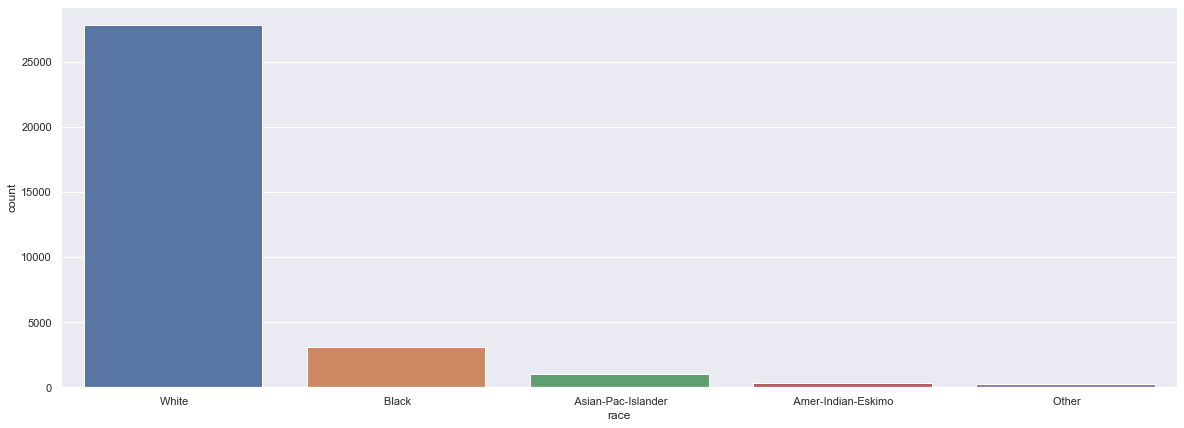

In [28]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'race', data = train_set)

<AxesSubplot:xlabel='race', ylabel='count'>

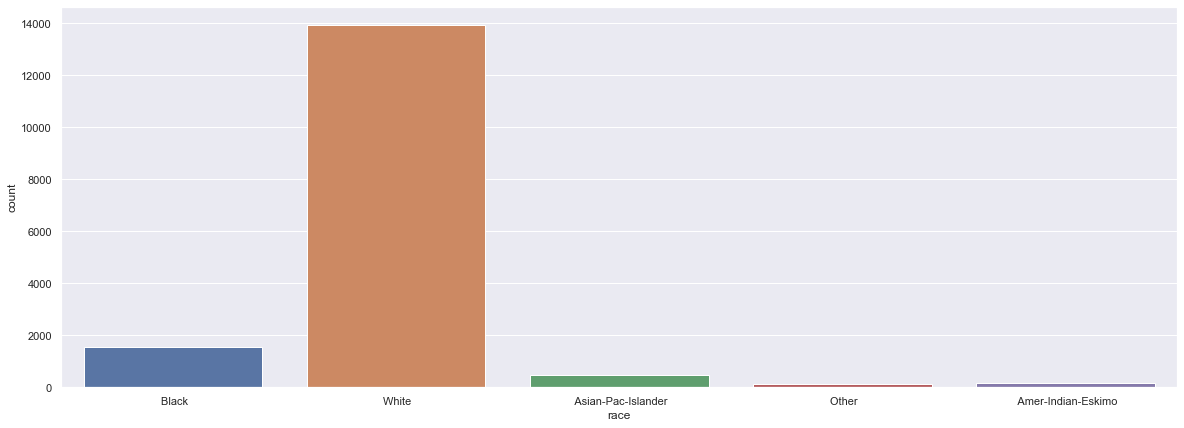

In [29]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'race', data = test_set)

# sex

<AxesSubplot:xlabel='sex', ylabel='count'>

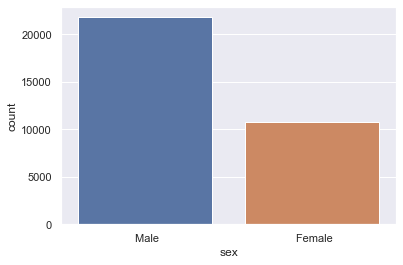

In [31]:
#plt.figure(figsize = (20, 7))
sns.countplot(x = 'sex', data = train_set)

<AxesSubplot:xlabel='sex', ylabel='count'>

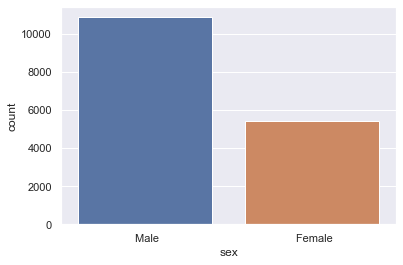

In [32]:
sns.countplot(x = 'sex', data = test_set)

# capital_gain

<AxesSubplot:xlabel='capital_gain'>

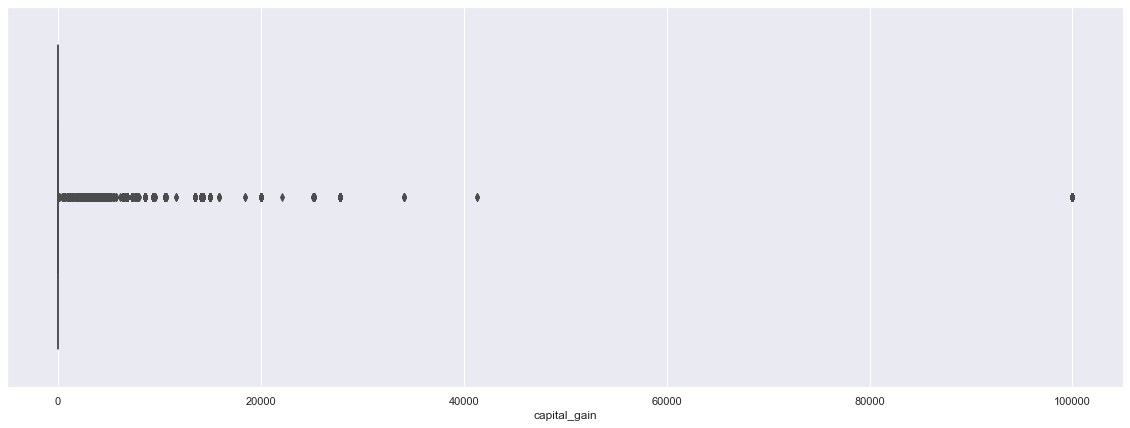

In [34]:
plt.figure(figsize = (20, 7))
sns.boxplot(x = 'capital_gain', data = train_set)

<AxesSubplot:xlabel='capital_gain'>

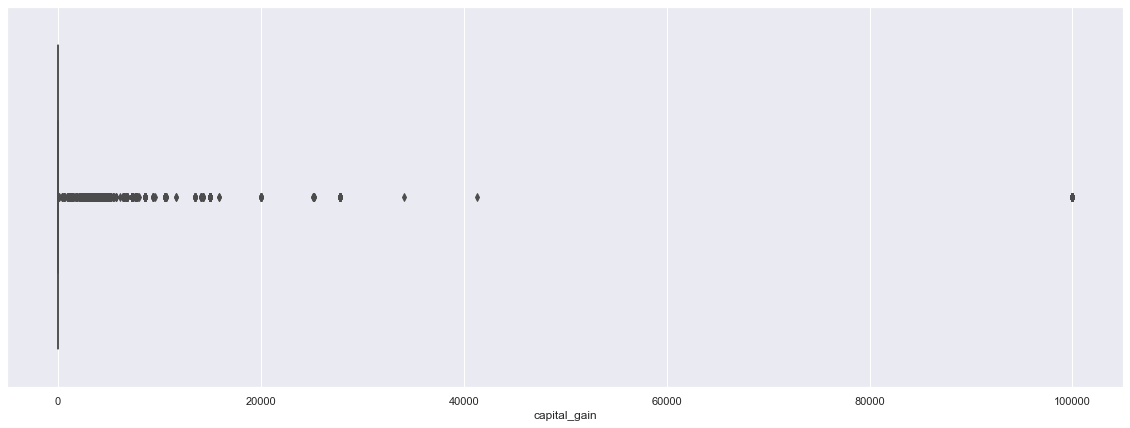

In [35]:
plt.figure(figsize = (20, 7))
sns.boxplot(x = 'capital_gain', data = test_set)

# capital_loss

<AxesSubplot:xlabel='capital_loss'>

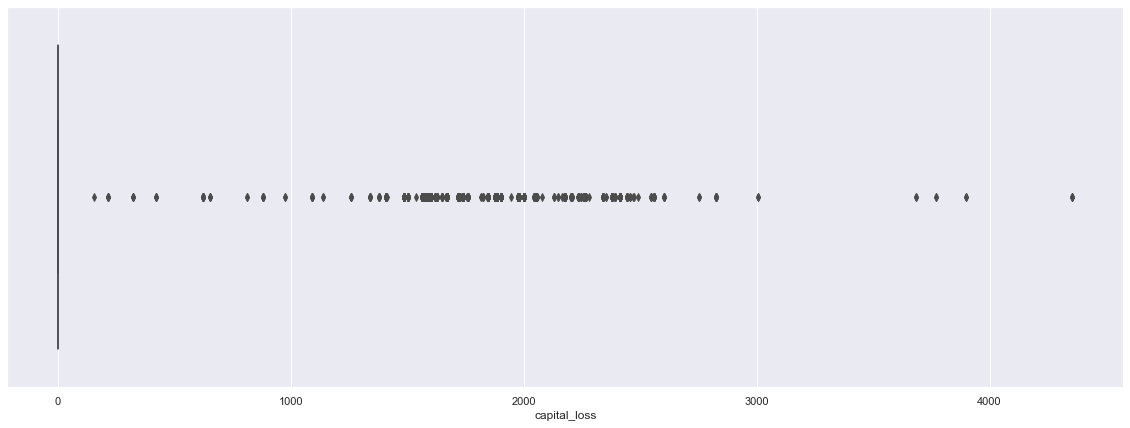

In [39]:
plt.figure(figsize = (20, 7))
sns.boxplot(x = 'capital_loss', data = train_set)

<AxesSubplot:xlabel='capital_loss'>

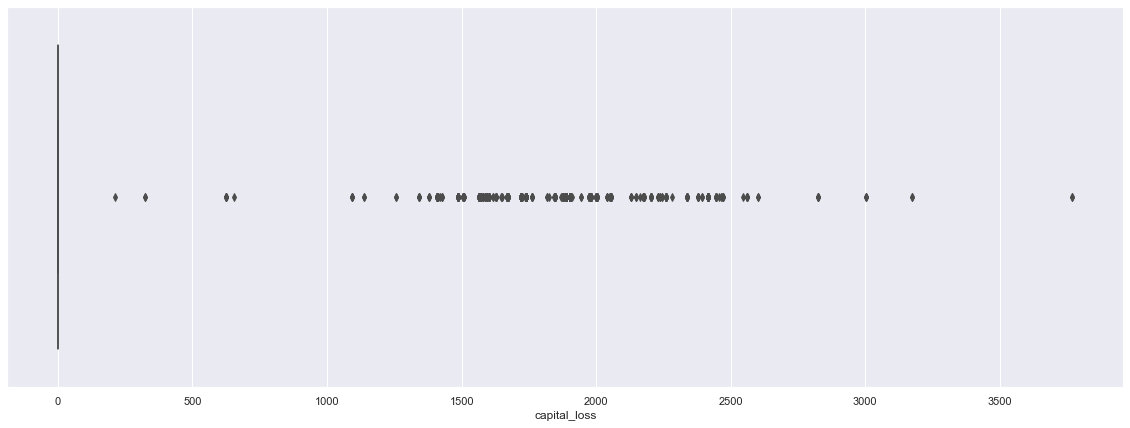

In [40]:
plt.figure(figsize = (20, 7))
sns.boxplot(x = 'capital_loss', data = test_set)

# hours_per_week

<AxesSubplot:xlabel='hours_per_week'>

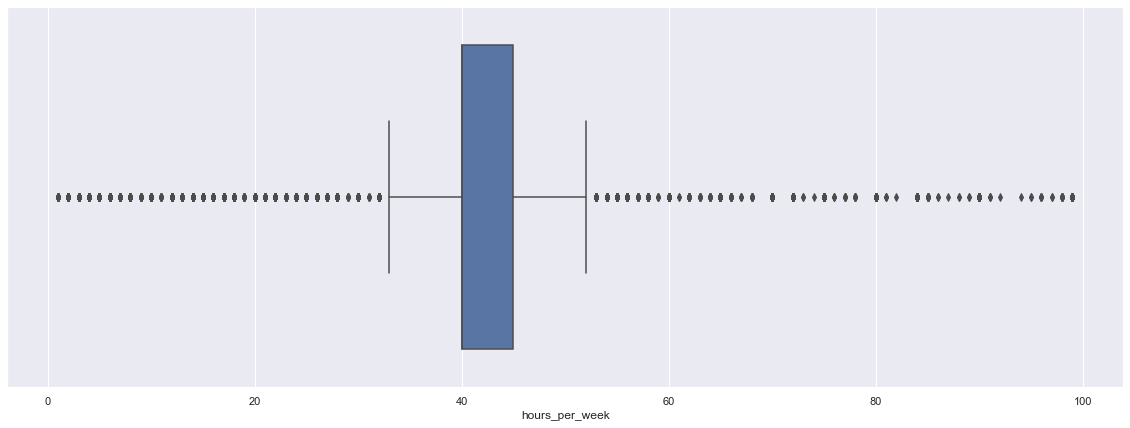

In [42]:
plt.figure(figsize = (20, 7))
sns.boxplot(x = 'hours_per_week', data = train_set)

<AxesSubplot:xlabel='hours_per_week'>

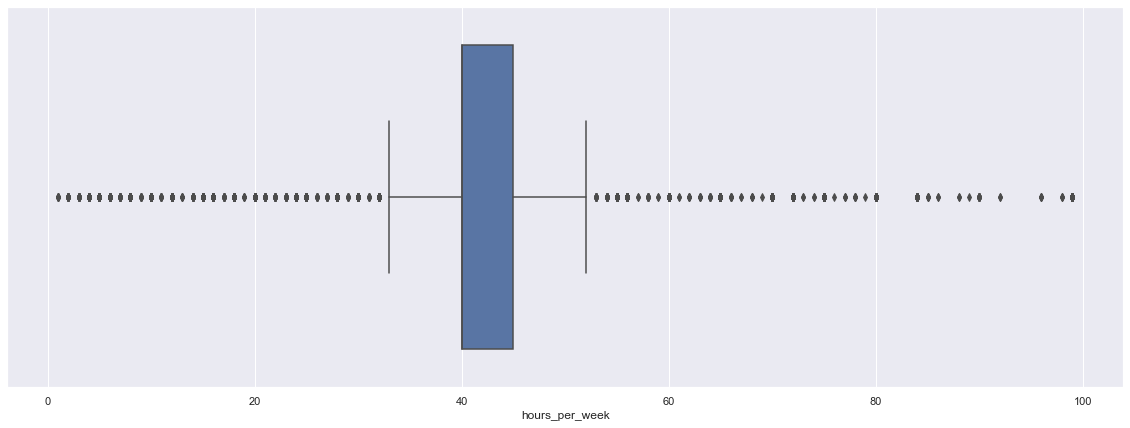

In [43]:
plt.figure(figsize = (20, 7))
sns.boxplot(x = 'hours_per_week', data = test_set)

# native_country

<AxesSubplot:xlabel='native_country', ylabel='count'>

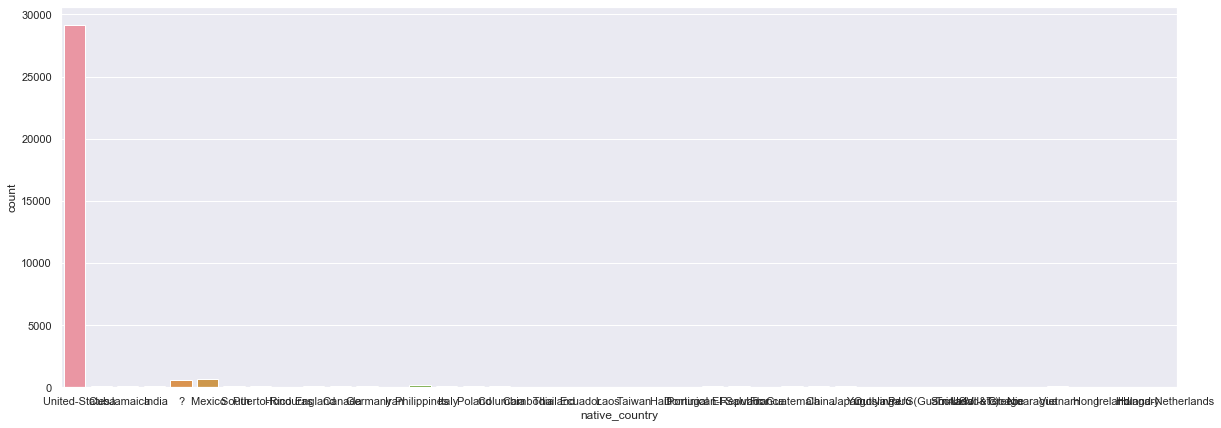

In [46]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'native_country', data = train_set)

<AxesSubplot:xlabel='native_country', ylabel='count'>

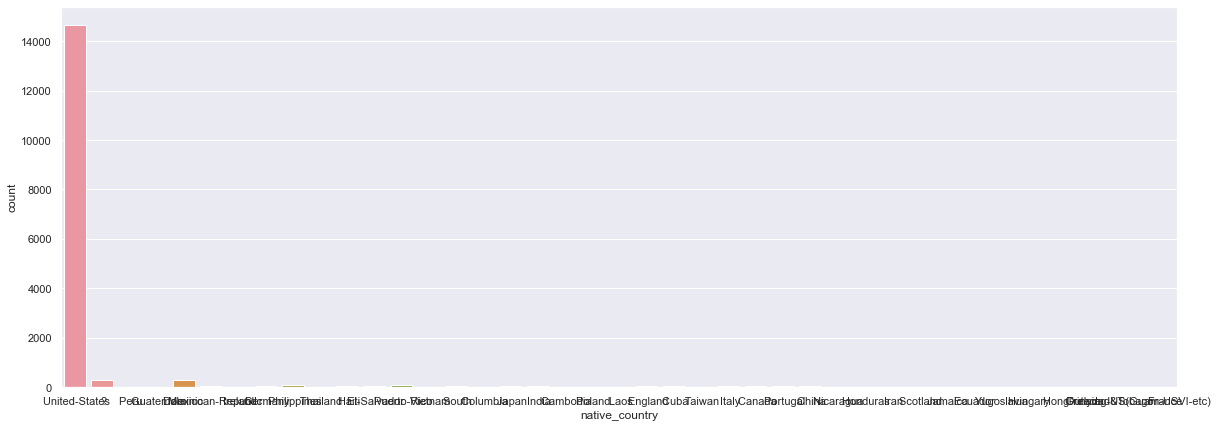

In [47]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'native_country', data = test_set)

# wage_class

<AxesSubplot:xlabel='wage_class', ylabel='count'>

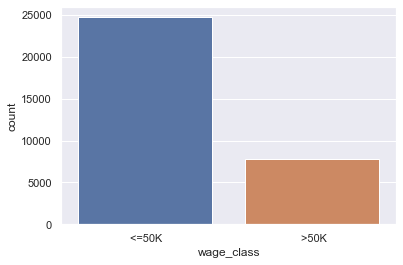

In [50]:
#plt.figure(figsize = (20, 7))
sns.countplot(x = 'wage_class', data = train_set)

<AxesSubplot:xlabel='wage_class', ylabel='count'>

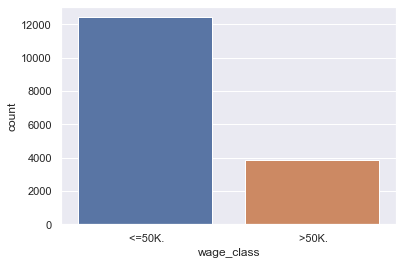

In [51]:
sns.countplot(x = 'wage_class', data = test_set)